![Python_logo](https://www.sitesnstores.com/wp-content/uploads/3-twitter-1.jpg)

# **Twitter Sentiment Analysis**

Twitter Sentiment Analysis involves analyzing a
dataset of tweets to determine the sentiment expressed in each tweet—whether it
is positive, negative, or neutral. 

## Aim:

The project aims to gain insights into public
opinions, trends, and sentiments shared on Twitter, utilizing data analytics
techniques.

# About Dataset

## Context

This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

## Content

It contains the following 6 fields:

**target:** the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

**ids:** The id of the tweet ( 2087)

**date:** the date of the tweet (Sat May 16 23:58:44 UTC 2009)

**flag:** The query (lyx). If there is no query, then this value is NO_QUERY.

**user:** the user that tweeted (robotickilldozr)

**text:** the text of the tweet (Lyx is cool)

# Lets import libraries and load data first

In [1]:
# import libraries
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Libraries used for Encoding
from sklearn.preprocessing import LabelEncoder

#Metrics
from sklearn.metrics import classification_report,confusion_matrix,r2_score, accuracy_score,precision_score,recall_score,f1_score,log_loss

#Hyperparametric Tuning
from sklearn.model_selection import GridSearchCV

import nltk
import string

In [2]:
import warnings
warnings.filterwarnings("ignore") # to ignoring warnings

In [3]:
# To load the data (.csv file)
data = pd.read_excel(r"G:\NEXUS PROJECTS\Task 2\twitter dataset final.xlsx")

# Data exploration

In [4]:
data.shape

(1048575, 6)

In [5]:
data.head()

,Target,Ids,Date,Flag,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
data.tail()

,Target,Ids,Date,Flag,User,Text
1048570,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048571,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048572,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048573,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?
1048574,4,1960186607,Fri May 29 07:33:45 PDT 2009,NO_QUERY,sugababez,cant wait til her date this weekend


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1048575 non-null  int64 
 1   Ids     1048575 non-null  int64 
 2   Date    1048575 non-null  object
 3   Flag    1048575 non-null  object
 4   User    1048575 non-null  object
 5   Text    1048377 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [8]:
data.describe(include = 'all')

,Target,Ids,Date,Flag,User,Text
count,1.048575e+06,1.048575e+06,1048575,1048575,1048575,1048377
unique,NaN,NaN,662453,1,511365,1035937
top,NaN,NaN,Fri May 22 05:10:17 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,17,1048575,549,210
mean,9.482431e-01,1.976166e+09,NaN,NaN,NaN,NaN
std,1.701120e+00,2.300580e+08,NaN,NaN,NaN,NaN
min,0.000000e+00,1.467811e+09,NaN,NaN,NaN,NaN
25%,0.000000e+00,1.824526e+09,NaN,NaN,NaN,NaN
50%,0.000000e+00,1.990869e+09,NaN,NaN,NaN,NaN
75%,0.000000e+00,2.198903e+09,NaN,NaN,NaN,NaN


### Checking unique values

In [9]:
data.nunique()

Target          2
Ids       1048044
Date       662453
Flag            1
User       511365
Text      1035937
dtype: int64

In [10]:
for column in data:
    unique_value=data[column].unique()
    print(f'unique Value in {column}:',unique_value)

unique Value in Target: [0 4]
unique Value in Ids: [1467810672 1467810917 1467811184 ... 1960186429 1960186445 1960186607]
unique Value in Date: ['Mon Apr 06 22:19:49 PDT 2009' 'Mon Apr 06 22:19:53 PDT 2009'
 'Mon Apr 06 22:19:57 PDT 2009' ... 'Fri May 29 07:33:44 PDT 2009'
 'Fri May 29 07:33:43 PDT 2009' 'Fri May 29 07:33:45 PDT 2009']
unique Value in Flag: ['NO_QUERY']
unique Value in User: ['scotthamilton' 'mattycus' 'ElleCTF' ... 'timg888' 'Madelinedugganx'
 'Falchion']
unique Value in Text: ["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'
 'my whole body feels itchy and like its on fire ' ...
 '@ShaDeLa same here  say it like from the Terminiator movies. comes off like just 3 words. :-D'
 '@DestinyHope92 im great thaanks  wbuu?'
 'cant wait til her date this weekend ']


### Analysing the amount of missing values

In [11]:
# create a table with data missing 
missing_values=data.isnull().sum() # missing values

percent_missing = data.isnull().sum()/data.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Target,0,0.000000
Ids,0,0.000000
Date,0,0.000000
Flag,0,0.000000
User,0,0.000000
Text,198,0.018883


In [12]:
data.isnull()

,Target,Ids,Date,Flag,User,Text
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1048570,False,False,False,False,False,False
1048571,False,False,False,False,False,False
1048572,False,False,False,False,False,False
1048573,False,False,False,False,False,False


In [13]:
data[data.duplicated()] # check if there are duplicates

,Target,Ids,Date,Flag,User,Text


# Data Cleaning and Imputation


In [30]:
# Handling missing values
# drop null values
data = data.dropna(subset=['Text'])

In [31]:
#percentage of missing values
data.isnull().sum()/len(data) 

Target        0.0
Ids           0.0
Date          0.0
Flag          0.0
User          0.0
Text          0.0
day           0.0
month         0.0
date          0.0
Time          0.0
pdt           0.0
Year          0.0
tidy_tweet    0.0
dtype: float64

In [33]:
# Handling duplicates
data.drop_duplicates() 

,Target,Ids,Date,Flag,User,Text,day,month,date,Time,pdt,Year,tidy_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Mon,Apr,06,22:19:49,PDT,2009,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Mon,Apr,06,22:19:53,PDT,2009,I dived many times for the ball. Managed to s...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Mon,Apr,06,22:19:57,PDT,2009,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Mon,Apr,06,22:19:57,PDT,2009,"no, it's not behaving at all. i'm mad. why am..."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,Mon,Apr,06,22:20:00,PDT,2009,not the whole crew
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum,Fri,May,29,07:33:44,PDT,2009,My GrandMa is making Dinenr with my Mum
1048571,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...,Fri,May,29,07:33:43,PDT,2009,Mid-morning snack time... A bowl of cheese noo...
1048572,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...,Fri,May,29,07:33:44,PDT,2009,same here say it like from the Terminiator m...
1048573,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?,Fri,May,29,07:33:44,PDT,2009,im great thaanks wbuu?


In [34]:
# splitting date column 
data[['day','month','date','Time','pdt','Year']] = data['Date'].str.split(' ', expand=True)


In [35]:
import re # for regular expressions

import nltk # for text manipulation

# Exploratory Data Analysis- EDA

In [36]:
## Count total users sentiments 0 = negative, 4 = positive
data['Target'].value_counts()

Target
0    799836
4    248541
Name: count, dtype: int64

In [37]:
#to find total users having no query 
data['Flag'].value_counts()

Flag
NO_QUERY    1048377
Name: count, dtype: int64

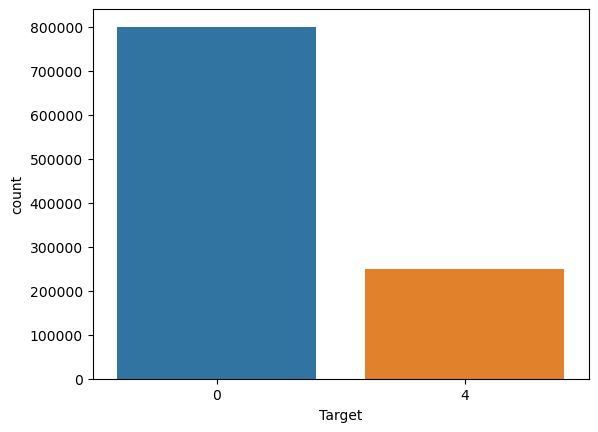

In [38]:
sns.countplot(x='Target', data=data)
plt.show()

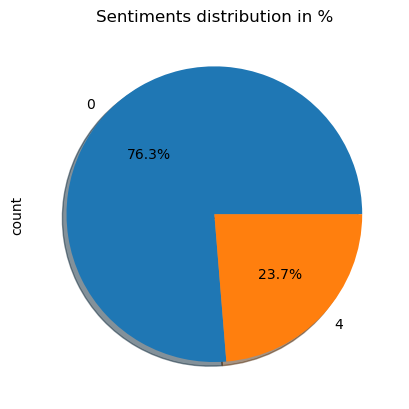

In [39]:
data["Target"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title('Sentiments distribution in %');

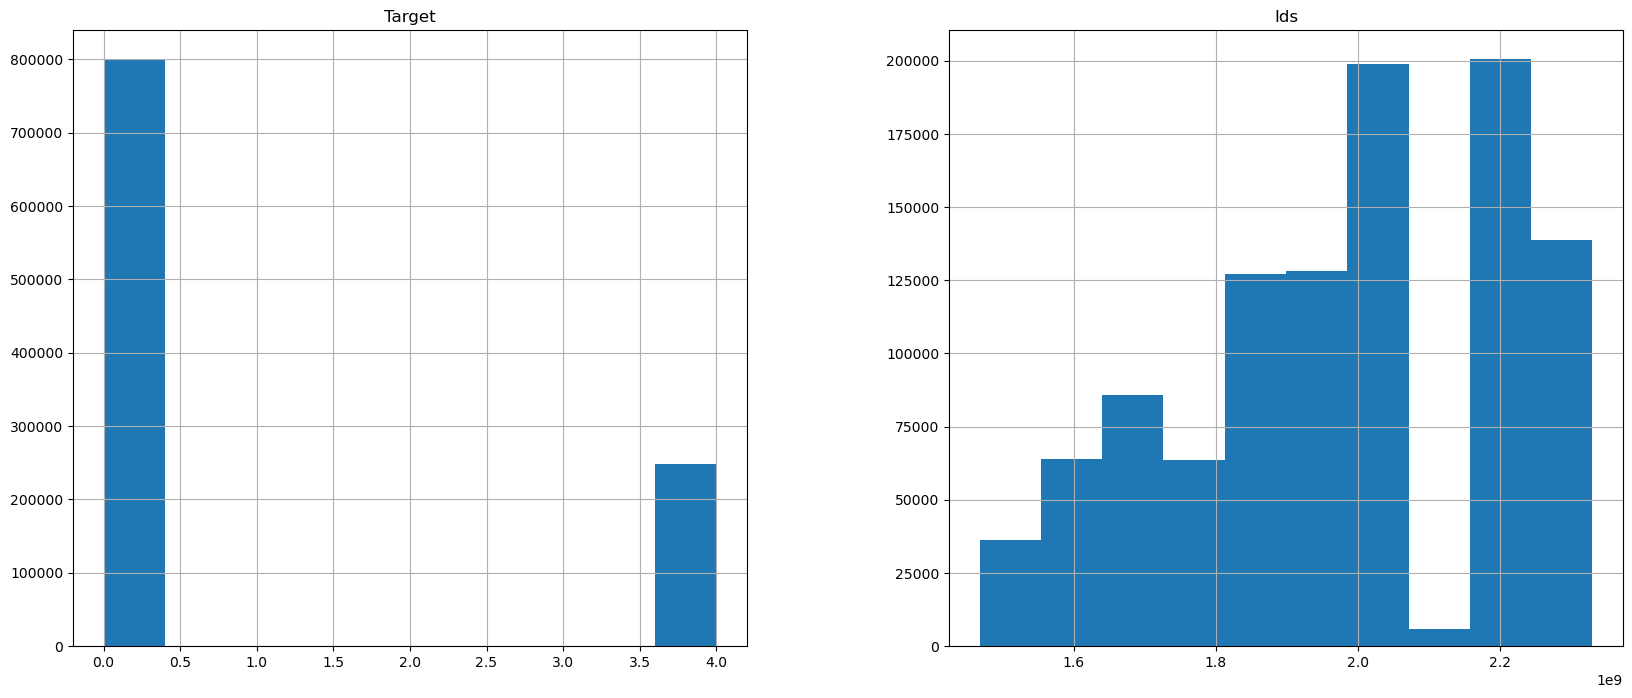

In [40]:
data.hist(figsize=(20,8));

## Text Preprocessing:

In [41]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

### 1. Removing twitter handles @user:

In [42]:
data['tidy_tweet'] = np.vectorize(remove_pattern)(data['Text'], "@[\w]*") 
data.head()

,Target,Ids,Date,Flag,User,Text,day,month,date,Time,pdt,Year,tidy_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Mon,Apr,06,22:19:49,PDT,2009,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Mon,Apr,06,22:19:53,PDT,2009,I dived many times for the ball. Managed to s...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Mon,Apr,06,22:19:57,PDT,2009,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Mon,Apr,06,22:19:57,PDT,2009,"no, it's not behaving at all. i'm mad. why am..."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,Mon,Apr,06,22:20:00,PDT,2009,not the whole crew


### 2. Removing Punctuations, Numbers, and Special Characters

In [43]:
data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z#.]", " ")
data.head(10)

,Target,Ids,Date,Flag,User,Text,day,month,date,Time,pdt,Year,tidy_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Mon,Apr,06,22:19:49,PDT,2009,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Mon,Apr,06,22:19:53,PDT,2009,I dived many times for the ball. Managed to s...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Mon,Apr,06,22:19:57,PDT,2009,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Mon,Apr,06,22:19:57,PDT,2009,"no, it's not behaving at all. i'm mad. why am..."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,Mon,Apr,06,22:20:00,PDT,2009,not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,Mon,Apr,06,22:20:03,PDT,2009,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,Mon,Apr,06,22:20:03,PDT,2009,"hey long time no see! Yes.. Rains a bit ,onl..."
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,Mon,Apr,06,22:20:05,PDT,2009,nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,Mon,Apr,06,22:20:09,PDT,2009,que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing,Mon,Apr,06,22:20:16,PDT,2009,spring break in plain city... it's snowing


### 3. Removing Short Words

In [44]:
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [45]:
data.head()

,Target,Ids,Date,Flag,User,Text,day,month,date,Time,pdt,Year,tidy_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Mon,Apr,06,22:19:49,PDT,2009,upset that can't update Facebook texting it......
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Mon,Apr,06,22:19:53,PDT,2009,dived many times ball. Managed save rest bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Mon,Apr,06,22:19:57,PDT,2009,whole body feels itchy like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Mon,Apr,06,22:19:57,PDT,2009,it's behaving all. mad. here? because can't ov...
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,Mon,Apr,06,22:20:00,PDT,2009,whole crew


## Word Frequency Analysis:

### Text Normalization
Here we will use nltk's PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [46]:
tokenized_tweet = data['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head()

0    [upset, that, can't, update, Facebook, texting...
1    [dived, many, times, ball., Managed, save, res...
2              [whole, body, feels, itchy, like, fire]
3    [it's, behaving, all., mad., here?, because, c...
4                                        [whole, crew]
Name: tidy_tweet, dtype: object

In [47]:
#Now we can normalize the tokenized tweets.
import nltk
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [48]:
tokenized_tweet.head()

0    [upset, that, can't, updat, facebook, text, it...
1    [dive, mani, time, ball., manag, save, rest, b...
2               [whole, bodi, feel, itchi, like, fire]
3    [it', behav, all., mad., here?, becaus, can't,...
4                                        [whole, crew]
Name: tidy_tweet, dtype: object

## Feature Importance

### Word Cloud:

### Story Generation and Visualization from Tweets

A) Understanding the common words used in the tweets: WordCloud

Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.


In [49]:
pip install wordcloud

In [50]:
%matplotlib inline

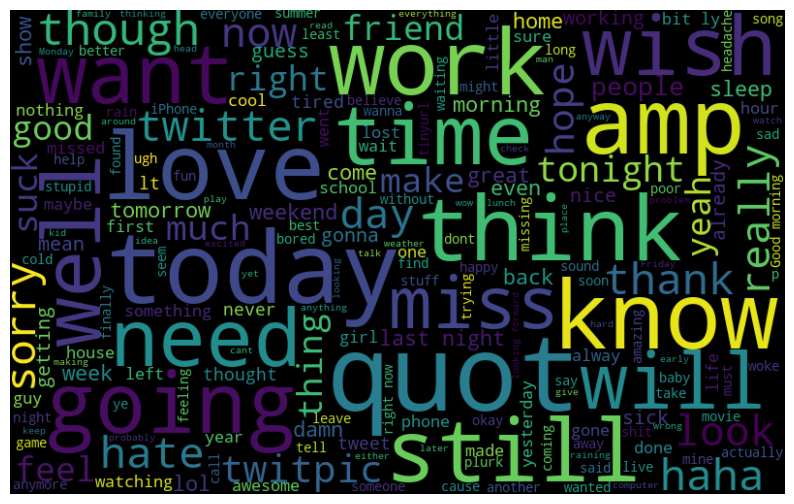

In [51]:
#Let’s visualize all the words our data using the wordcloud plot.

all_words = ' '.join([text for text in data['tidy_tweet']])

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### B) Words in non racist/sexist tweets


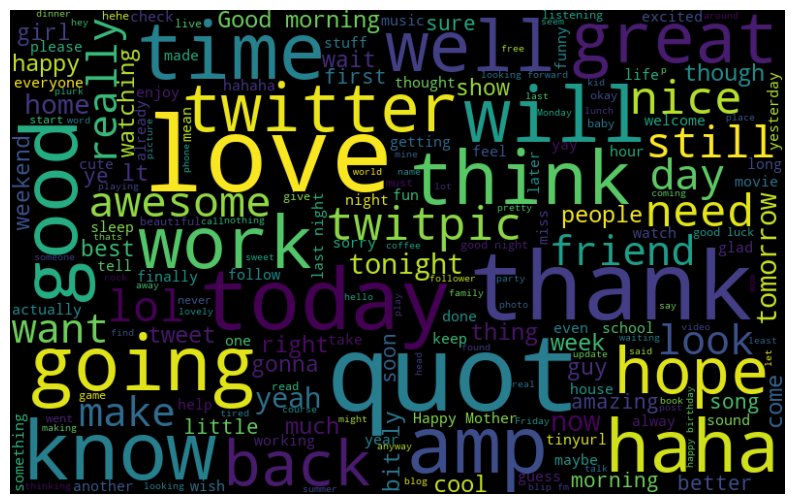

In [53]:
normal_words =' '.join([text for text in data['tidy_tweet'][data['Target'] == 4]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### C) Racist/Sexist Tweets

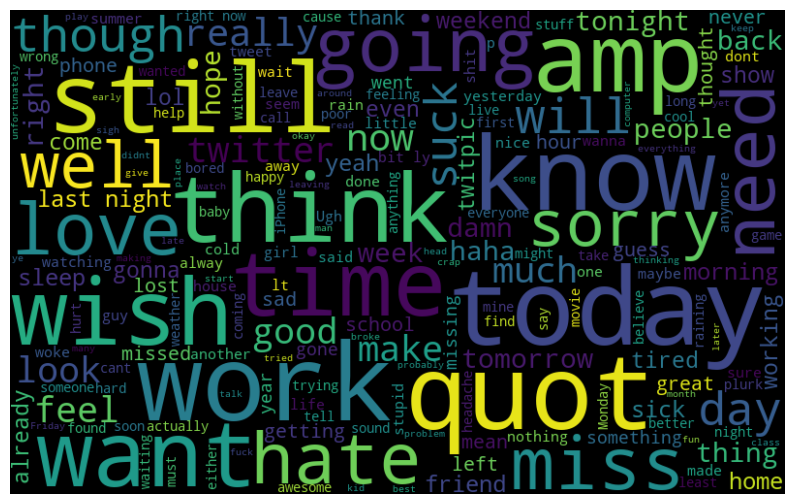

In [54]:
negative_words = ' '.join([text for text in data['tidy_tweet'][data['Target'] == 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Extracting Features from Cleaned Tweets

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim

In [59]:
#Bag-of-Words Features

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(data['tidy_tweet'])
bow.shape

(1048377, 1000)

In [60]:
# TF-IDF Features

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data['tidy_tweet'])
tfidf.shape

(1048377, 1000)

## Model Building: Logistic Regression

In [61]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


### Bag-of-Words Features

In [62]:
#Bag-of-Words Features

train_bow = bow[:1048377,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, data['Target'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [63]:
model = LogisticRegression()

model.fit(xtrain_bow, ytrain) # training the model

prediction = model.predict_proba(xvalid_bow) # predicting on the validation set

prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0

prediction_int = prediction_int.astype(int)



In [64]:
print(f1_score(yvalid,prediction_int,average = "micro"))

0.6245699714480119


In [65]:
#Calculate the accuracy of the model
print(accuracy_score(yvalid, prediction_int)*100) 

62.456997144801186


 ### TF-IDF Features

In [66]:
# TF-IDF Features

train_tfidf = tfidf[:1048574,:]
test_tfidf = tfidf[31962:,:]

# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, data['Target'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [67]:
model.fit(xtrain_tfidf, ytrain)

prediction = model.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)

f1_score(yvalid, prediction_int, average = 'micro')


0.622312520269368

In [68]:
#Calculate the accuracy of the model
print(accuracy_score(yvalid, prediction_int)*100) 


62.2312520269368


# Documentation:

## Twitter Sentiment Analysis Project Documentation 

## Project Overview: 
 The Twitter Sentiment Analysis project involves analyzing a dataset of tweets to determine the sentiment expressed in each tweet, categorizing it as either positive or negative. The goal is to gain insights into public opinions and sentiments shared on Twitter, utilizing various data preprocessing and visualization techniques. 
  
## Code Implementation: 
 The provided Python code demonstrates the data preprocessing steps and sentiment visualization using various libraries such as pandas, matplotlib, seaborn, and wordcloud. Here's a brief overview of the code: 
 
## Data Loading and Exploration: 
 Reads the dataset ('tweets.csv') using pandas. 
 Renames columns for better readability. 
 Drops unnecessary columns ('id', 'Date', 'flag', 'user'). 

## Data Cleaning: 
 
 Decodes sentiment labels (0 and 4) into meaningful categories (Negative and Positive). 
 Handles duplicate entries and missing values. 
 Reduces the dataset size to 50,000 randomly sampled tweets. 

## Text Preprocessing: 

 Converts text to lowercase. 
 Removes leading and trailing whitespaces. 
 Removes HTML tags and URLs. 
 Expands abbreviations. 
 Removes punctuation. 
 Tokenizes the text. 
 Removes stop words.
 
## Exploratory Data Analysis (EDA): 
  
 Visualizes the distribution of sentiment labels using a bar chart. 
 Analyzes word and character lengths distribution. 
 
## Word Clouds 

 Generates word clouds for both positive and negative sentiments to visualize frequent words. 

## Dependencies: 
  
 The code requires the installation of various Python libraries, including pandas, matplotlib,        
 seaborn, wordcloud, and nltk. Ensure they are installed before running the code. 
 
## Data Modeling:
 using logistic Regression algorithm model accuracy of data for better prediction

## Conclusion: 
 The Twitter Sentiment Analysis project aims to provide a preliminary understanding of sentiment   
 distribution in a Twitter dataset. The documentation serves as a guide for understanding the project 
 objectives, steps, and code implementation. Further development may include sentiment prediction 
 models and more in-depth analysis of feature importance.

# Problems faced :

* Due to large dataset the process became more time taking.
* Before tokenizing text column data removing punctuations, characters and other symbols was challenging.
* Accuracy of data could be better by updating and adding more relevant data.
 